In [1]:
import numpy as np
import pandas as pd
 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 
import statsmodels.api as sm
 
import matplotlib.pyplot as plt

In [2]:
data_url = 'https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv'
df = pd.read_csv(data_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df['BMI'].to_numpy().reshape(-1,1)

y = df['Glucose'].to_numpy().reshape(-1,1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [5]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train) 

y_pred = regr.predict(X_test)

In [6]:
print(f'coefficient of determination:  {r2_score(y_test, y_pred)}')

print(f'coefficients: {regr.coef_}')

print(f'mean squared error: {mean_squared_error(y_test, y_pred)}')

coefficient of determination:  0.051710037956085975
coefficients: [[0.88558366]]
mean squared error: 1070.586081656323


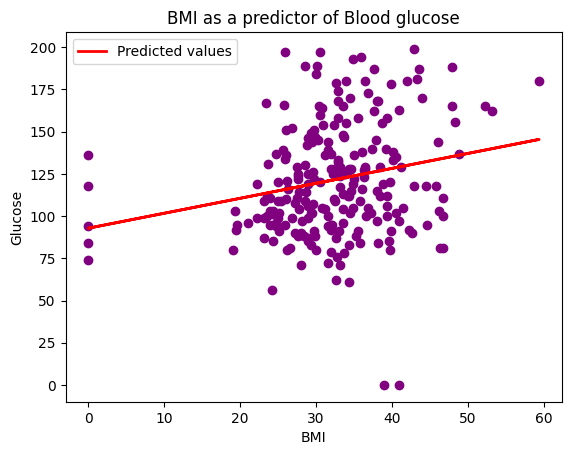

In [13]:
plt.scatter(X_test, y_test, color='purple')
plt.plot(X_test, y_pred, color ='red', linewidth =2 , label='Predicted values')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.legend(loc="upper left")
plt.title('BMI as a predictor of Blood glucose')
plt.show()

In [16]:
prediction_df = pd.DataFrame()

prediction_df['BMI'] = np.arange(60,70)

prediction_df['Glucose'] = regr.predict(np.arange(60,70).reshape(-1,1))

prediction_df

,BMI,Glucose
0,60,145.940854
1,61,146.826438
2,62,147.712022
3,63,148.597605
4,64,149.483189
5,65,150.368773
6,66,151.254356
7,67,152.139940
8,68,153.025524
9,69,153.911107


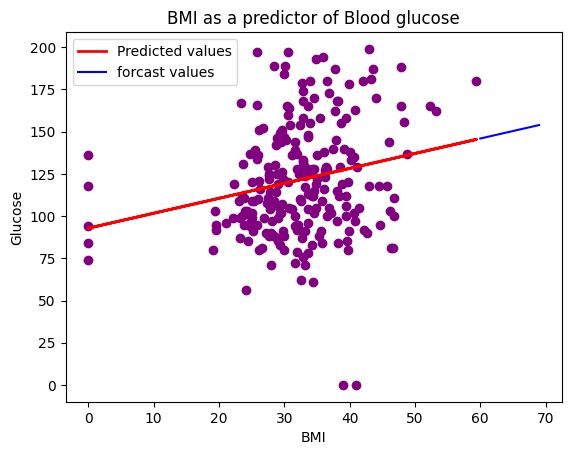

In [19]:
plt.scatter(X_test, y_test, color='purple')
plt.plot(X_test, y_pred, color ='red', linewidth =2 , label='Predicted values')
plt.plot(prediction_df['BMI'], prediction_df['Glucose'], color = 'blue', label = 'forcast values')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.legend(loc="upper left")
plt.title('BMI as a predictor of Blood glucose')
plt.show()

In [31]:
# X and y
X = df[['BMI', 'BloodPressure']]
y = df['Glucose'].to_numpy().reshape(-1,1)
 
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
 
# make a regression object
mv_regr = linear_model.LinearRegression()
 
# fit and predict
mv_regr.fit(X_train, y_train)
y_pred = mv_regr.predict(X_test)
 
#check out our coefficients etc
print(mv_regr.coef_)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
 
# put in some values to predict outcomes
mv_regr.predict(pd.DataFrame(
    [
        {'BMI':60,
         'BloodPressure':60},
        {'BMI':29,
         'BloodPressure':60},
    ]
))
 

[[0.75962906 0.12123185]]
916.452015879278
0.08096059911827336


array([[141.77989494],
       [118.23139422]])